# Домашнее задание №3

In [60]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics

%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 10,7

Таблица Indian liver pations records.

Загрузить датасет https://www.kaggle.com/uciml/indian-liver-patient-records. 

In [5]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv(url)
data.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


Columns:

*  Age of the patient
*  Gender of the patient
*  Total Bilirubin
*  Direct Bilirubin
*  Alkaline Phosphotase
*  Alamine Aminotransferase
*  Aspartate Aminotransferase
*  Total Protiens
*  Albumin
*  Albumin and Globulin Ratio
*  Dataset: field used to split the data into two sets (patient with liver disease, or no disease)


Dataset: пациент с болезнью печени - 1,
         пациент не болеет - 2

Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin, предварительно разделив данные на 80% тренировочных и 20% тестовых. Построить график: исходных тренировочных и тестовых данных, а также прямой линейной регрессии.

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [94]:
direct_bil = data['Direct_Bilirubin']
total_bil = data['Total_Bilirubin']
direct_bil = np.array(direct_bil).reshape(-1,1)
total_bil = np.array(total_bil).reshape(-1,1)

from sklearn.model_selection import train_test_split

# x = Direct_Bilirubin,
# y = Total_Bilirubin
X_train, X_test, y_train, y_test = train_test_split(
    direct_bil,
    total_bil,
    test_size = 0.2
)

In [20]:
model.fit(X_train, y_train)
predicted_y = model.predict(X_test)
model.score(X_test, y_test)

0.9330847049851969

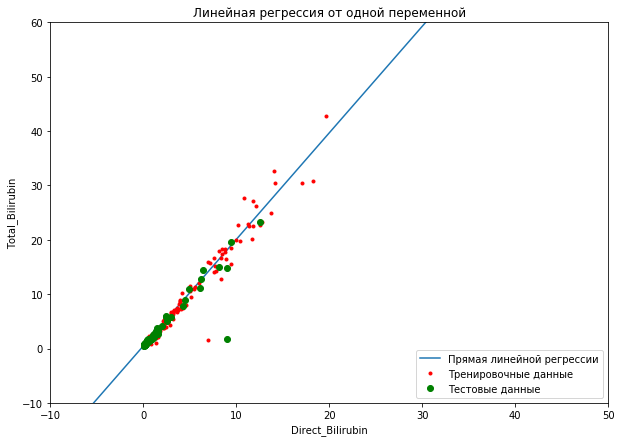

In [95]:
plt.xlabel('Direct_Bilirubin')
plt.ylabel('Total_Bilirubin')
plt.title('Линейная регрессия от одной переменной')
x = np.linspace(-50, 200, 100)
y = model.coef_*x + model.intercept_
y = np.transpose(y)
plt.plot(x,y)
plt.plot(X_train, y_train, 'r.')
plt.plot(X_test, y_test, 'go')
plt.xlim(-10,50)
plt.ylim(-10,60)
plt.legend(['Прямая линейной регрессии', 'Тренировочные данные', 'Тестовые данные'])
plt.show()

Пример, как считать квантили:

In [25]:
age = data['Age']
print("Q2 квантиль ряда : ", np.quantile(age, .50)) 
print("Q1 квантиль ряда : ", np.quantile(age, .25)) 
print("Q3 квантиль ряда : ", np.quantile(age, .75)) 
print("10 квантиль ряда : ", np.quantile(age, .1)) 

Q2 квантиль ряда :  45.0
Q1 квантиль ряда :  33.0
Q3 квантиль ряда :  58.0
10 квантиль ряда :  23.0


Примеры квантилей 10%, 25%, 50%, 75% для всех колонок таблицы data

In [26]:
data.quantile([.10, .25, .50, .75], axis = 0) 

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0.10,23.0,0.7,0.1,150.0,18.0,19.0,5.1,2.0,0.546,1.0
0.25,33.0,0.8,0.2,175.5,23.0,25.0,5.8,2.6,0.700,1.0
0.50,45.0,1.0,0.3,208.0,35.0,42.0,6.6,3.1,0.930,1.0
0.75,58.0,2.6,1.3,298.0,60.5,87.0,7.2,3.8,1.100,2.0


Пример квартилей:

In [27]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


Посчитать квартили для всех колонок. 

In [28]:
data.quantile([.25, .50, .75], axis = 0) 

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0.25,33.0,0.8,0.2,175.5,23.0,25.0,5.8,2.6,0.70,1.0
0.50,45.0,1.0,0.3,208.0,35.0,42.0,6.6,3.1,0.93,1.0
0.75,58.0,2.6,1.3,298.0,60.5,87.0,7.2,3.8,1.10,2.0


Построить график histogram двух выборок по показателю Direct_Bilirubin: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?

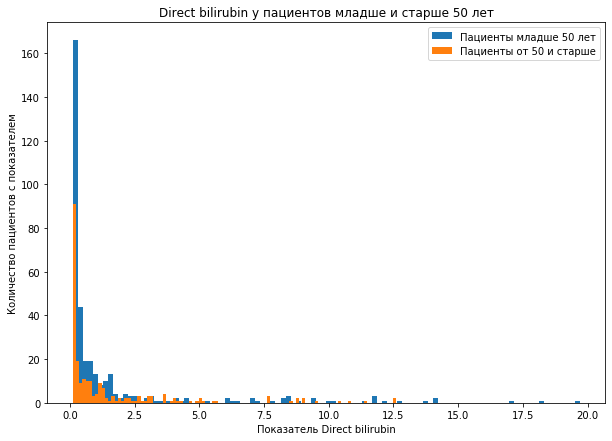

In [62]:
#создадим выборки и построим для них гистограммы
under_50 = data[data['Age'] < 50]['Direct_Bilirubin']
up_50 = data[data['Age'] >= 50]['Direct_Bilirubin']

plt.hist(under_50, 100)
plt.hist(up_50, 100)
plt.xlabel('Показатель Direct bilirubin')
plt.ylabel('Количество пациентов с показателем')
plt.title('Direct bilirubin у пациентов младше и старше 50 лет')
plt.legend(['Пациенты младше 50 лет', 'Пациенты от 50 и старше'])
plt.show()

In [58]:
#посчитаем средние значения и квартили
print('Среднее значение по пациентам младше 50 равно', round(statistics.mean(under_50), 3))
print('Квартили по выборке пациентов младше 50:\n', under_50.quantile([.25, .50, .75]), sep='')

print('Среднее значение по пациентам от 50 и старше равно', round(statistics.mean(up_50), 3))
print('Квартили по выборке пациентов от 50 и старше:\n', up_50.quantile([.25, .50, .75]), sep='')

Среднее значение по пациентам младше 50 равно 1.495
Квартили по выборке пациентов младше 50:
0.25    0.2
0.50    0.3
0.75    1.1
Name: Direct_Bilirubin, dtype: float64
Среднее значение по пациентам от 50 и старше равно 1.473
Квартили по выборке пациентов от 50 и старше:
0.25    0.2
0.50    0.4
0.75    1.3
Name: Direct_Bilirubin, dtype: float64


**Вывод**: выборки отличаются незначительно. В обеих мы наблюдаем скорее всего экспоненциальное распределение. Можно лишь отметить разницу во втором и третьем квартилях — для пациентов старше 50 лет они больше по значению, то есть у большинства старших пациентов этот показатель все-таки чуть выше.

Посчитать критерий одновыборочный t-критерий для выборки по критерию Total_Bilirubin у больных людей. Как показатель помогает понять, что выборки не похожа на генеральную совокупность? Сравнить т-критерий с табличным показателем Стьюдента.

In [72]:
sick = data[data['Dataset'] == 1]['Total_Bilirubin']
stats.ttest_1samp(sick, data['Total_Bilirubin'].mean())

Ttest_1sampResult(statistic=2.471063305746647, pvalue=0.013871861207640042)

In [78]:
print('Количество больных всего: ', len(sick))

Количество больных всего:  416


**Вывод**: результат будет зависеть от допущенной в расчетах альфа-ошибки. 

Если принять доверительную вероятность 0,95, то полученный t-критерий будет выше табличного значения (берем последнюю строку таблицы, так как наше число степеней свободы равно 415). Также pvalue не будет превышать допущенную величину ошибки. Следовательно, выборка не похожа на генеральную совокупность.

Если принять рекомендованную в медицинских исследованиях доверительную вероятность 0,99, то полученный t-критерий укладывается в табличное значение (<2,576). Также pvalue в этом случае превышает величину альфа-ошибки. Следовательно, выборка похожа на генеральную совокупность.

Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). Имеют ли данные группы схожесть?

In [79]:
healthy = data[data['Dataset'] == 2]['Total_Bilirubin']
print(stats.ttest_ind(sick, healthy))

Ttest_indResult(statistic=5.441441126834863, pvalue=7.801430929364345e-08)


**Вывод**: очевидно, что эти выборки не похожи — t-критерий превышает табличное значение.

Посчитать статистическую значимость для трех выборок (по возрасту) - 1ая группа от 1 до 30 лет, 2ая группа от 30 лет до 55, 3я группа более 55 по выборке Dataset. Сравнить с реальностью (они логично что будут отличаться).

In [92]:
under30 = data[data['Age'] < 30]['Total_Bilirubin']
under55 = data[(data['Age'] < 55) & (data['Age'] >= 30)]['Total_Bilirubin']
up_55 = data[data['Age'] >= 55]['Total_Bilirubin']
print(len(under30), len(under55), len(up_55), len(data['Total_Bilirubin']))

print(stats.f_oneway(under30, under55, up_55))
print(stats.f_oneway(under30, under55, up_55, data['Total_Bilirubin']))

105 302 176 583
F_onewayResult(statistic=1.9358927130115473, pvalue=0.14522662764594652)
F_onewayResult(statistic=1.2885195549817425, pvalue=0.27689252667017356)


**Вывод**: если я все верно поняла, то судя по pvalue — нулевая гипотеза подтверждается, и выборки похожи друг на друга и на генеральную совокупность.

Вопросы задавать на почту yustiks@gmail.com